In [1]:
import numpy as np
import uproot
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py

In [2]:
f = open("temp_data/Bi.txt")
energy = []
crs = []
for line in f:
    energy.append(float(line[3:14]))
    crs.append(float(line[20:27]))
energy = np.array(energy)
crs = np.array(crs)

In [3]:
def xsec_to_ts(xsec, rho, d, m):
    return np.exp(-rho * d * xsec / m)
def tof_to_energy(tof, x, m, c):
    return m * (1 / np.sqrt(1 - x * x / c / c / tof / tof) - 1)
def energy_to_tof(energy, x, m, c):
    return x * (energy + m) / c / np.sqrt(energy ** 2 + 2 * energy * m)

In [15]:
def search(arr, target):
    left = 0
    right = len(arr) - 1
    while left < right - 1:
        mid = left + (right - left) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid
        else:
            right = mid
    return left

In [5]:
tof = energy_to_tof(energy, 182.24, 939.56542, 299792458) * 1e9
ts = xsec_to_ts(crs * 1e-28, 9747, 0.01, 3.47e-25)

In [6]:
tof = tof[::-1]
ts = ts[::-1]

In [16]:
tof

array([1.20053731e+03, 1.20608203e+03, 1.20699827e+03, ...,
       3.95320807e+09, 3.96712502e+09, 4.16650127e+09])

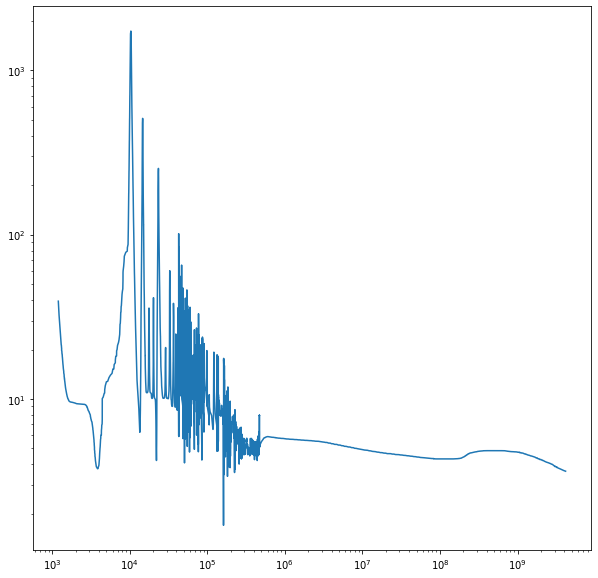

In [7]:
plt.figure(figsize=(10,10))
plt.plot(tof, crs)
plt.xscale('log')
plt.yscale('log')

In [17]:
energy_to_tof(795.6 / 1e6, 182.24, 939.56542, 299792458) * 1e9

467115.63807334506

In [18]:
energy_to_tof(806.02 / 1e6, 182.24, 939.56542, 299792458) * 1e9

464086.4501162091

In [23]:
left = search(tof, 464086.4501162091)
right = search(tof, 467115.63807334506)

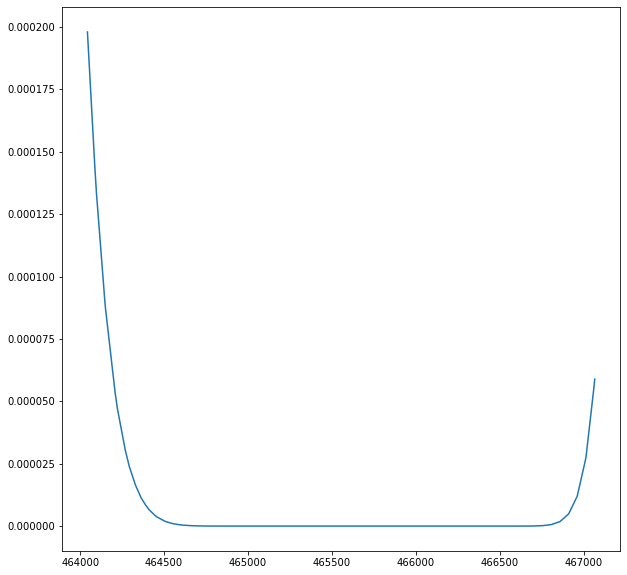

In [24]:
plt.figure(figsize=(10,10))
plt.plot(tof[left:right], ts[left:right])

In [25]:
BiIn = h5py.File("temp_data/BiIn.hdf5", "r")
BiOut = h5py.File("temp_data/BiOut.hdf5", "r")
amp_BiIn = BiIn['amp'][:]
en_BiIn = BiIn['energy'][:]
tof_BiIn = BiIn['tof'][:]
norm_BiIn = BiIn['norm'][0]
amp_BiOut = BiOut['amp'][:]
en_BiOut = BiOut['energy'][:]
tof_BiOut = BiOut['tof'][:]
norm_BiOut = BiOut['norm'][0]

In [26]:
tof_BiIn_select = tof_BiIn[(tof_BiIn > 464086.4501162091) & (tof_BiIn < 467115.63807334506) & (amp_BiIn > 4000)]

In [27]:
tof_BiIn_select

array([464371.76513955])

In [28]:
1 / norm_BiIn

7.995496690023161e-18

In [29]:
467115.63807334506 - 464086.4501162091

3029.1879571359605

In [30]:
tof_BiIn_select = tof_BiIn[(en_BiIn > 600) & (en_BiIn < 1000) & (amp_BiIn > 4000)]
tof_BiOut_select = tof_BiOut[(en_BiOut > 600) & (en_BiOut < 1000) & (amp_BiOut > 4000)]

In [31]:
from src.graph import graph
from src.transmission import transmission

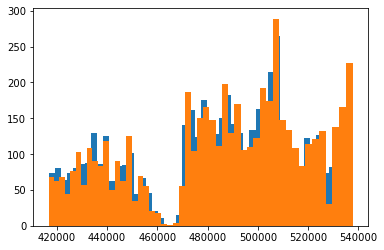

In [32]:
hist_BiIn, bins_BiIn, _, _ = graph(tof_BiIn_select, 50)

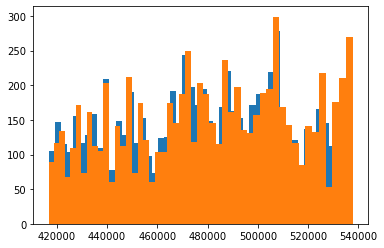

In [33]:
hist_BiOut, bins_BiOut, _, _ = graph(tof_BiOut_select, 50)

In [34]:
x_tof = (bins_BiIn[1:] + bins_BiIn[:-1]) / 2

In [35]:
error_BiIn =  np.sqrt(hist_BiIn)
error_BiIn[error_BiIn == 0] = 0.7

In [36]:
tr, tr_error = transmission(hist_BiIn / norm_BiIn, error_BiIn / norm_BiIn, hist_BiOut / norm_BiOut, np.sqrt(hist_BiOut) / norm_BiOut)

<ErrorbarContainer object of 3 artists>

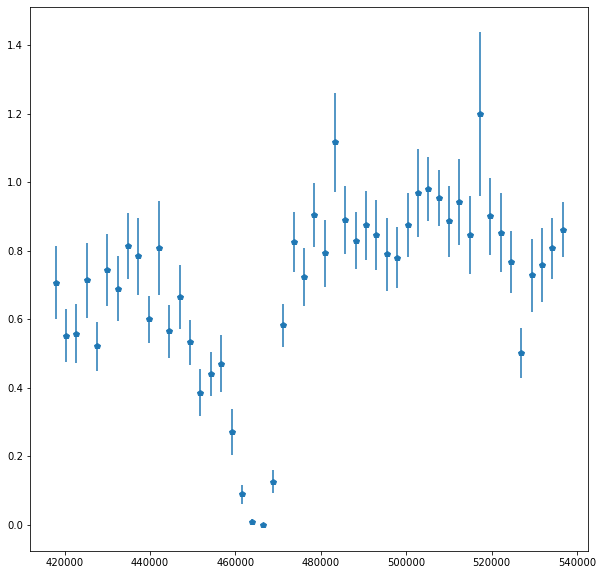

In [37]:
plt.figure(figsize=(10,10))
plt.errorbar(x_tof, tr, yerr=tr_error, fmt="p")

In [201]:
def chi_sq(tr, tr_error, L, t, x_tof, crs, energy):
    ts = xsec_to_ts(np.array(crs) * 1e-28, 9747, t, 3.47e-25)
    tof = energy_to_tof(energy, L, 939.56542, 299792458) * 1e9
    y_ts = []
    for x in x_tof:
        index = search(tof, x)
        y = ts[index]
        y_ts.append(y)
    y_ts = np.array(y_ts)
    r = y_ts - tr
    chi_sq = np.sum((r / tr_error) ** 2)
    return chi_sq

In [80]:
chi_sq(tr, tr_error, 182.24, 0.01, x_tof, crs, energy)

74.94491080307522

In [87]:
chi_sq(tr, tr_error, 182.4, 0.01, x_tof, crs, energy)

67.68225227939003

In [102]:
chi_sqs = []
Ls = np.linspace(181,184,301)

In [103]:
for L in Ls:
    chi_sqs.append(chi_sq(tr, tr_error, L, 0.01, x_tof, crs, energy))
    print(L)

181.0
181.01
181.02
181.03
181.04
181.05
181.06
181.07
181.08
181.09
181.1
181.11
181.12
181.13
181.14
181.15
181.16
181.17
181.18
181.19
181.2
181.21
181.22
181.23
181.24
181.25
181.26
181.27
181.28
181.29
181.3
181.31
181.32
181.33
181.34
181.35
181.36
181.37
181.38
181.39
181.4
181.41
181.42
181.43
181.44
181.45
181.46
181.47
181.48
181.49
181.5
181.51
181.52
181.53
181.54
181.55
181.56
181.57
181.58
181.59
181.6
181.61
181.62
181.63
181.64
181.65
181.66
181.67
181.68
181.69
181.7
181.71
181.72
181.73
181.74
181.75
181.76
181.77
181.78
181.79
181.8
181.81
181.82
181.83
181.84
181.85
181.86
181.87
181.88
181.89
181.9
181.91
181.92
181.93
181.94
181.95
181.96
181.97
181.98
181.99
182.0
182.01
182.02
182.03
182.04
182.05
182.06
182.07
182.08
182.09
182.1
182.11
182.12
182.13
182.14
182.15
182.16
182.17
182.18
182.19
182.2
182.21
182.22
182.23
182.24
182.25
182.26
182.27
182.28
182.29
182.3
182.31
182.32
182.33
182.34
182.35
182.36
182.37
182.38
182.39
182.4
182.41
182.42
182.43
182.44


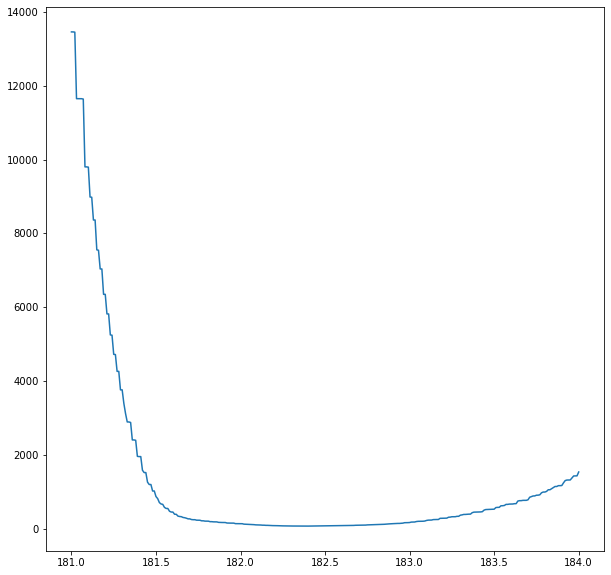

In [215]:
plt.figure(figsize=(10,10))
plt.plot(Ls, chi_sqs)
#plt.yscale('log')

In [106]:
min_idx = 0
min_chi = float('inf')
for i in range(301):
    if chi_sqs[i] < min_chi:
        min_chi = chi_sqs[i]
        min_idx = i

In [107]:
min_idx

139

In [108]:
min_chi

67.60265038792726

In [109]:
Ls[139]

182.39

In [125]:
chi_sqs[132]

68.882987000646

In [127]:
chi_sqs[143]

68.65019800809264

In [128]:
Ls[132]

182.32

In [129]:
Ls[143]

182.43

In [138]:
chi_sqs2 = []
ths = np.linspace(0.009,0.012,301)

In [139]:
for th in ths:
    chi_sqs2.append(chi_sq(tr, tr_error, 182.39, th, x_tof, crs, energy))
    print(th)

0.009
0.009009999999999999
0.009019999999999999
0.00903
0.00904
0.009049999999999999
0.009059999999999999
0.00907
0.00908
0.009089999999999999
0.009099999999999999
0.00911
0.00912
0.00913
0.009139999999999999
0.00915
0.00916
0.00917
0.009179999999999999
0.009189999999999999
0.0092
0.00921
0.009219999999999999
0.009229999999999999
0.00924
0.00925
0.00926
0.009269999999999999
0.00928
0.00929
0.0093
0.009309999999999999
0.00932
0.00933
0.00934
0.009349999999999999
0.00936
0.00937
0.00938
0.009389999999999999
0.009399999999999999
0.00941
0.00942
0.00943
0.009439999999999999
0.00945
0.00946
0.00947
0.009479999999999999
0.00949
0.0095
0.00951
0.009519999999999999
0.00953
0.00954
0.00955
0.009559999999999999
0.009569999999999999
0.00958
0.00959
0.0096
0.009609999999999999
0.00962
0.00963
0.00964
0.009649999999999999
0.00966
0.00967
0.00968
0.009689999999999999
0.0097
0.00971
0.00972
0.009729999999999999
0.009739999999999999
0.00975
0.00976
0.00977
0.009779999999999999
0.00979
0.0098
0.00981
0

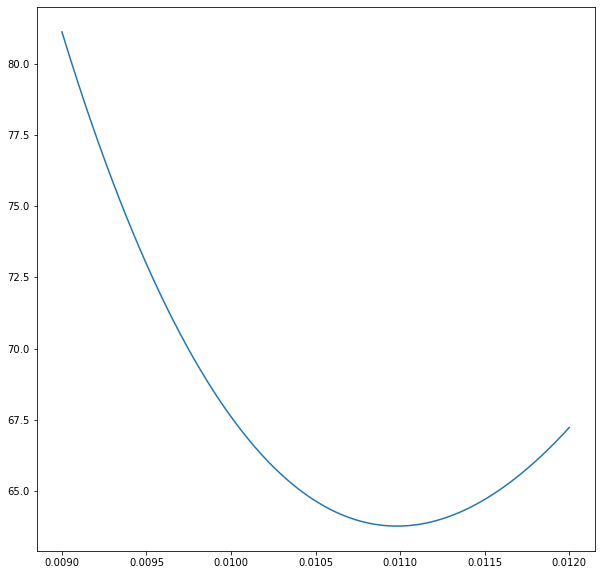

In [140]:
plt.figure(figsize=(10,10))
plt.plot(ths, chi_sqs2)

In [141]:
min_idx2 = 0
min_chi2 = float('inf')
for i in range(301):
    if chi_sqs2[i] < min_chi2:
        min_chi2 = chi_sqs2[i]
        min_idx2 = i

In [142]:
min_idx2

198

In [143]:
min_chi2

63.758200940218074

In [144]:
ths[min_idx2]

0.01098

In [153]:
chi_sqs2[147]

64.75639892104394

In [160]:
chi_sqs2[252]

64.76606179313258

In [161]:
ths[147]

0.01047

In [162]:
ths[252]

0.011519999999999999

In [189]:
def y_fit(energy, L):
    return np.ones(50)*L**2

In [172]:
def y_fit(energy, L):
    ts = xsec_to_ts(np.array(crs) * 1e-28, 9747, 0.01, 3.47e-25)
    tof = energy_to_tof(energy, L, 939.56542, 299792458) * 1e9
    y_ts = []
    for x in x_tof:
        index = search(tof, x)
        y = ts[index]
        y_ts.append(y)
    y_ts = np.array(y_ts)
    return y_ts

In [64]:
from scipy import optimize

In [191]:
optimize.curve_fit(y_fit, energy, tr, sigma=tr_error, p0=100, absolute_sigma=True)

(array([0.20893829]), array([[5.8222286e-05]]))

In [206]:
y_ts = []
for x in x_tof:
    index = search(tof, x)
    y = ts[index]
    y_ts.append(y)

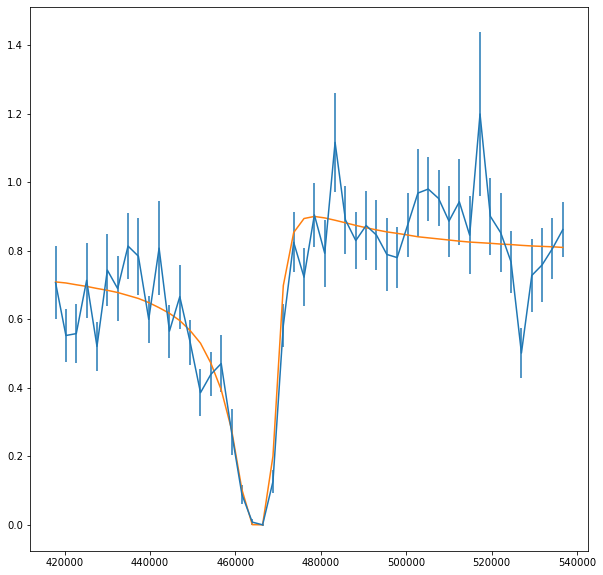

In [209]:
plt.figure(figsize=(10,10))
plt.errorbar(x_tof, tr, yerr=tr_error)
plt.plot(x_tof, y_ts)

In [210]:
y_ts = []
for x in x_tof:
    y_ts.append(np.interp(x, tof, ts))

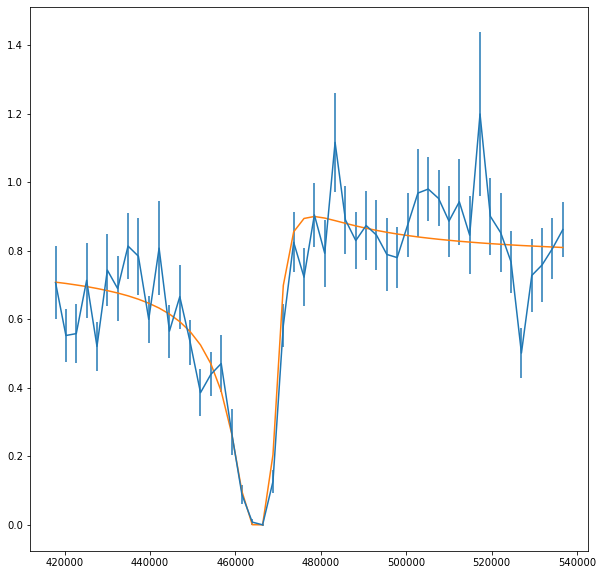

In [211]:
plt.figure(figsize=(10,10))
plt.errorbar(x_tof, tr, yerr=tr_error)
plt.plot(x_tof, y_ts)

In [230]:
def chi_sq(tr, tr_error, L, t, x_tof, crs, energy):
    ts = xsec_to_ts(np.array(crs) * 1e-28, 9747, t, 3.47e-25)[::-1]
    tof = energy_to_tof(energy, L, 939.56542, 299792458)[::-1] * 1e9
    y_ts = []
    for x in x_tof:
        index = search(tof, x)
        y = ts[index]
        y_ts.append(y)
    y_ts = np.array(y_ts)
    r = y_ts - tr
    chi_sq = np.sum((r / tr_error) ** 2)
    return chi_sq

In [38]:
def chi_sq(tr, tr_error, L, t, x_tof, crs, energy):
    ts = xsec_to_ts(np.array(crs) * 1e-28, 9747, t, 3.47e-25)[::-1]
    tof = energy_to_tof(energy, L, 939.56542, 299792458)[::-1] * 1e9
    y_ts = []
    for x in x_tof:
        y_ts.append(np.interp(x, tof, ts))
    y_ts = np.array(y_ts)
    r = y_ts - tr
    chi_sq = np.sum((r / tr_error) ** 2)
    return chi_sq

In [39]:
chi_sq(tr, tr_error, 182.24, 0.01, x_tof, crs, energy)

74.05584465550824

In [40]:
chi_sqs = []
Ls = np.linspace(181,184,301)

In [41]:
for L in Ls:
    chi_sqs.append(chi_sq(tr, tr_error, L, 0.01, x_tof, crs, energy))

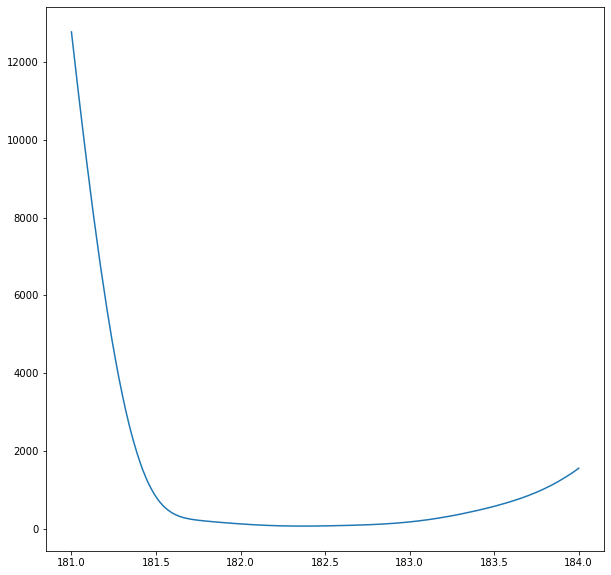

In [42]:
plt.figure(figsize=(10,10))
plt.plot(Ls, chi_sqs)
#plt.yscale('log')

In [43]:
min_idx = 0
min_chi = float('inf')
for i in range(301):
    if chi_sqs[i] < min_chi:
        min_chi = chi_sqs[i]
        min_idx = i

In [44]:
min_idx

136

In [45]:
min_chi

67.91799141163591

In [46]:
Ls[136]

182.36

In [47]:
chi_sqs[142]

68.93078060370672

In [48]:
chi_sqs[131]

69.02252972256659

In [49]:
Ls[142]

182.42

In [50]:
Ls[131]

182.31

In [51]:
chi_sqs2 = []
ths = np.linspace(0.009,0.012,301)

In [52]:
for th in ths:
    chi_sqs2.append(chi_sq(tr, tr_error, 182.36, th, x_tof, crs, energy))

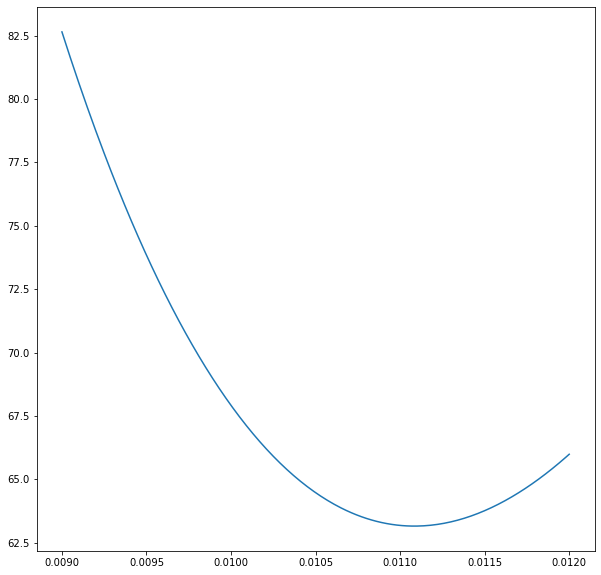

In [53]:
plt.figure(figsize=(10,10))
plt.plot(ths, chi_sqs2)

In [54]:
min_idx2 = 0
min_chi2 = float('inf')
for i in range(301):
    if chi_sqs2[i] < min_chi2:
        min_chi2 = chi_sqs2[i]
        min_idx2 = i

In [55]:
min_idx2

208

In [56]:
min_chi2

63.15628705867973

In [57]:
ths[min_idx2]

0.01108

In [58]:
chi_sqs2[157]

64.17193628213114

In [59]:
chi_sqs2[262]

64.15640729030059

In [60]:
ths[157]

0.01057

In [61]:
ths[262]

0.01162

In [62]:
def y_fit(energy, L):
    ts = xsec_to_ts(np.array(crs) * 1e-28, 9747, 0.01, 3.47e-25)[::-1]
    tof = energy_to_tof(energy, L, 939.56542, 299792458)[::-1] * 1e9
    y_ts = []
    for x in x_tof:
        y_ts.append(np.interp(x, tof, ts))
    y_ts = np.array(y_ts)
    return y_ts

In [65]:
optimize.curve_fit(y_fit, energy, tr, sigma=tr_error, p0=185, absolute_sigma=True)

(array([182.3645531]), array([[0.00249658]]))

In [66]:
def y_fit(energy, t):
    ts = xsec_to_ts(np.array(crs) * 1e-28, 9747, t, 3.47e-25)[::-1]
    tof = energy_to_tof(energy, 182.36, 939.56542, 299792458)[::-1] * 1e9
    y_ts = []
    for x in x_tof:
        y_ts.append(np.interp(x, tof, ts))
    y_ts = np.array(y_ts)
    return y_ts

In [67]:
optimize.curve_fit(y_fit, energy, tr, sigma=tr_error, p0=0.01, absolute_sigma=True)

(array([0.01108481]), array([[2.65528211e-07]]))

In [68]:
def y_fit(energy, L, t):
    ts = xsec_to_ts(np.array(crs) * 1e-28, 9747, t, 3.47e-25)[::-1]
    tof = energy_to_tof(energy, L, 939.56542, 299792458)[::-1] * 1e9
    y_ts = []
    for x in x_tof:
        y_ts.append(np.interp(x, tof, ts))
    y_ts = np.array(y_ts)
    return y_ts

In [69]:
optimize.curve_fit(y_fit, energy, tr, sigma=tr_error, p0=[182.24, 0.01], absolute_sigma=True)

(array([1.82347043e+02, 1.11001045e-02]),
 array([[ 3.11767954e-03, -4.21521432e-06],
        [-4.21521432e-06,  2.71309709e-07]]))

In [70]:
fit, sig = optimize.curve_fit(y_fit, energy, tr, sigma=tr_error, p0=[182.24, 0.01], absolute_sigma=True)

In [71]:
fit

array([1.82347043e+02, 1.11001045e-02])

In [72]:
np.sqrt(np.diag(sig))

array([0.05583618, 0.00052087])